In [1]:
from sklearn.datasets import load_boston
data = load_boston()

In [2]:
x, y = data.data, data.target

In [3]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
d = load_boston()

In [5]:
import pandas as pd
data = pd.DataFrame( d.data, columns=d.feature_names)

In [6]:
data["MEDV"] = d.target

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Seperating features into X and target into Y

In [8]:
X = data[ ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'] ]
y = data[ "MEDV" ]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=9 ) ##random state has no sense it can be any value till 2^32-1

In [10]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.head())
    print(" "*40)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
217  0.07013   0.0  13.89   0.0  0.550  6.642  85.1  3.4211  5.0  276.0   
25   0.84054   0.0   8.14   0.0  0.538  5.599  85.7  4.4546  4.0  307.0   
235  0.33045   0.0   6.20   0.0  0.507  6.086  61.5  3.6519  8.0  307.0   
62   0.11027  25.0   5.13   0.0  0.453  6.456  67.8  7.2255  8.0  284.0   
6    0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   

     PTRATIO       B  LSTAT  
217     16.4  392.78   9.69  
25      21.0  303.42  16.51  
235     17.4  376.75  10.88  
62      19.7  396.90   6.73  
6       15.2  395.60  12.43  
                                        
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
464   7.83932   0.0  18.10   0.0  0.655  6.209  65.4  2.9634  24.0  666.0   
419  11.81230   0.0  18.10   0.0  0.718  6.824  76.5  1.7940  24.0  666.0   
277   0.06127  40.0   6.41   1.0  0.447  6.826  27.6  4.8628   4.0  254.0   
491   0.10574   0.0 

In [11]:
y_test.head()

464    21.4
419     8.4
277    33.1
491    13.6
337    18.5
Name: MEDV, dtype: float64

# Importing Linear regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train , y_train)

LinearRegression()

In [15]:
import numpy as np
np.array(model.coef_)

array([-1.10653650e-01,  4.35058932e-02,  5.27220034e-02,  2.23444360e+00,
       -1.58398648e+01,  3.89237897e+00,  1.01476364e-03, -1.32124422e+00,
        2.84930457e-01, -1.15585903e-02, -9.02839713e-01,  8.45742872e-03,
       -5.27607786e-01])

In [16]:
data.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
actual = y_test.iloc[:10]
predicted = model.predict(X_test.iloc[:10])

In [18]:
for i,j in zip(actual,predicted):
    
    print(i," : ",j)

21.4  :  20.553001129739396
8.4  :  15.095787678477468
33.1  :  34.082251923458045
13.6  :  14.502212697945588
18.5  :  19.30350061636765
23.8  :  23.25307471987277
35.1  :  34.647798268488636
36.2  :  27.904902929656068
17.7  :  20.48931691271693
15.6  :  16.38080868243525


# RMS Value

In [19]:
from math import sqrt

In [20]:
#python way

sum_of_squared_error = 0
for i,j in zip(actual,predicted):
    
    error = i - j
    squared_error = error**2
    
    sum_of_squared_error = sum_of_squared_error + squared_error
    
mean_squared_error = sum_of_squared_error / len(actual)

root_mean_squared_error = sqrt(mean_squared_error)
print(root_mean_squared_error)

3.5451036609390636


# RMS Value of errors

In [21]:
import matplotlib.pyplot as plt

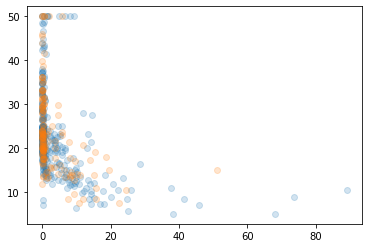

In [22]:
plt.scatter(X_train["CRIM"], y_train, alpha=.2)
plt.scatter(X_test["CRIM"], y_test, alpha=.2)

In [23]:
model.score(X_test, y_test)

0.7826126074271011

# DATA VISUALIZATION

[]

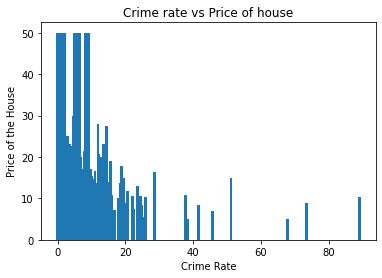

In [25]:
#Plotting graph between CRIM and MEDV
plt.bar(data.CRIM,data.MEDV)
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

[]

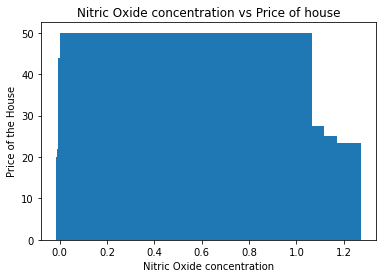

In [26]:
#Plotting graph between NOX and MEDV
plt.bar(data.NOX,data.MEDV)
plt.xlabel('Nitric Oxide concentration')
plt.ylabel('Price of the House')
plt.title('Nitric Oxide concentration vs Price of house')
plt.plot()

[]

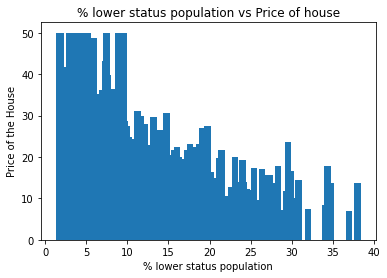

In [27]:
#Plotting graph between LSTAT and MEDV
plt.bar(data.LSTAT,data.MEDV)
plt.xlabel('% lower status population')
plt.ylabel('Price of the House')
plt.title('% lower status population vs Price of house')
plt.plot()

# Implementation of EDA

In [28]:
import seaborn as sns

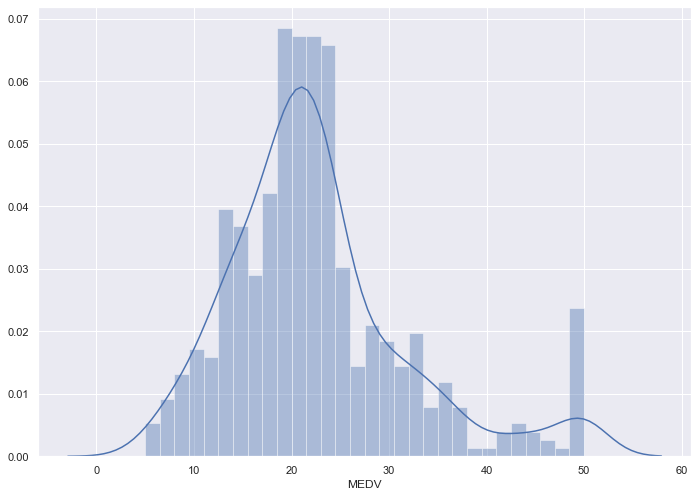

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

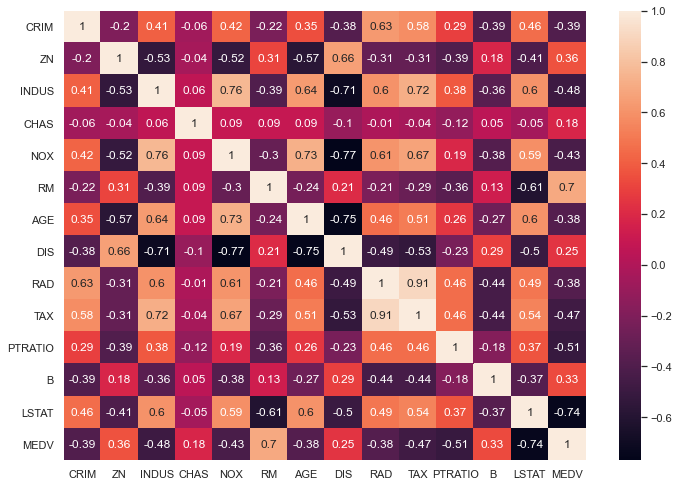

In [30]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#annot = True to print the values inside the square